# Mutag

In [1]:
import numpy as np
import os,sys
module_path = os.path.abspath(os.path.join('/Users/vayer/Documents/OT/Python/GW_tests/'))
if module_path not in sys.path:
    sys.path.append(module_path)
from graph import *
import copy
import NN,time
from sklearn.model_selection import StratifiedKFold
import ot_distances
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from ot_distances import Gromov_distance as GW
from ot_distances import Wasserstein_distance as EMD
from ot_distances import Gromov_Wasserstein_distance as WGW

In [2]:
path='./MUTAG_2/'

In [3]:
dataset=build_MUTAG_dataset(path)

In [4]:
X,y=zip(*dataset)

In [5]:
d={'epsilon': 100.0, 'normalize_distance': True, 'method': 'shortest_path'}

In [6]:
gw=GW(epsilon=100,method='shortest_path')

Classe :  1


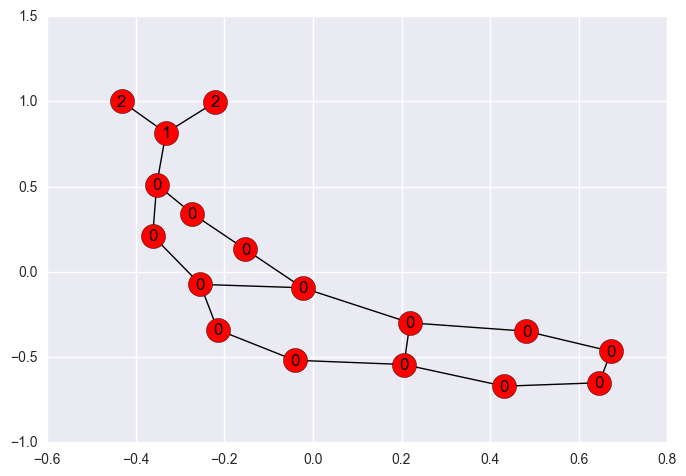

In [7]:
print('Classe : ',y[0])
X[0].display_graph(labels= nx.get_node_attributes(X[0].nx_graph, 'attr_name'))

Classe :  -1


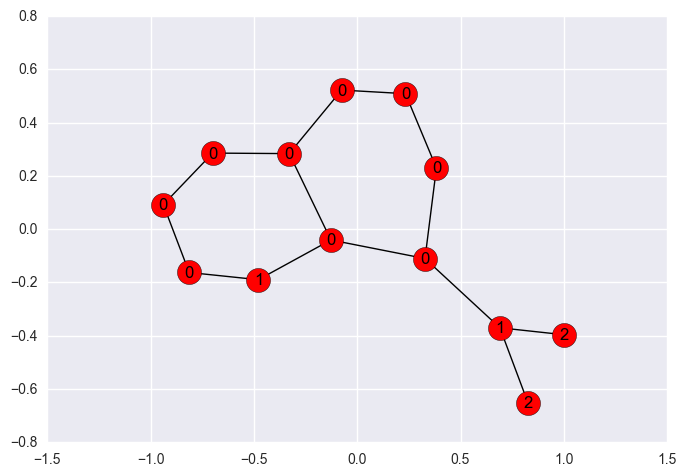

In [8]:
print('Classe : ',y[1])
X[1].display_graph(labels= nx.get_node_attributes(X[1].nx_graph, 'attr_name'))

### Influence de epsilon sur la map

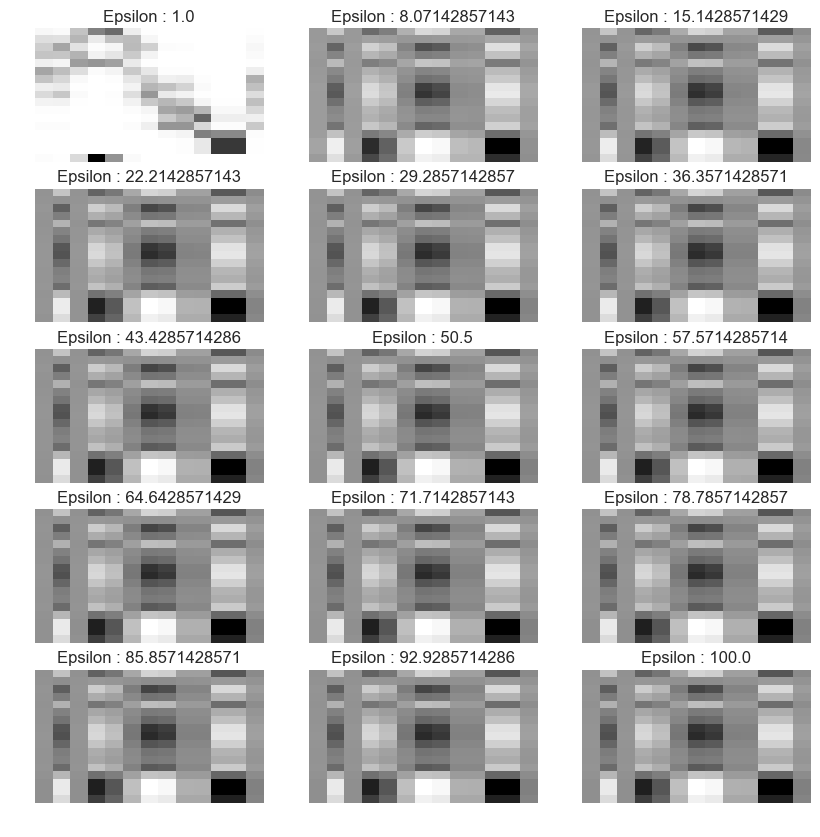

In [89]:
foo=[]
epsilons=np.linspace(1,100,15)
for eps in epsilons:
    gw=GW(epsilon=eps,method='shortest_path')
    d=gw.graph_d(graph1=X[0],graph2=X[1])
    foo.append(gw.transp)
fig, axs = plt.subplots(5, 3,figsize=(10, 10))
for i, ax in enumerate(axs.ravel()):
    ax.imshow(foo[i],interpolation='nearest', aspect='auto')
    ax.set_axis_off()
    ax.set_title('Epsilon : '+str(epsilons[i]))
plt.show()

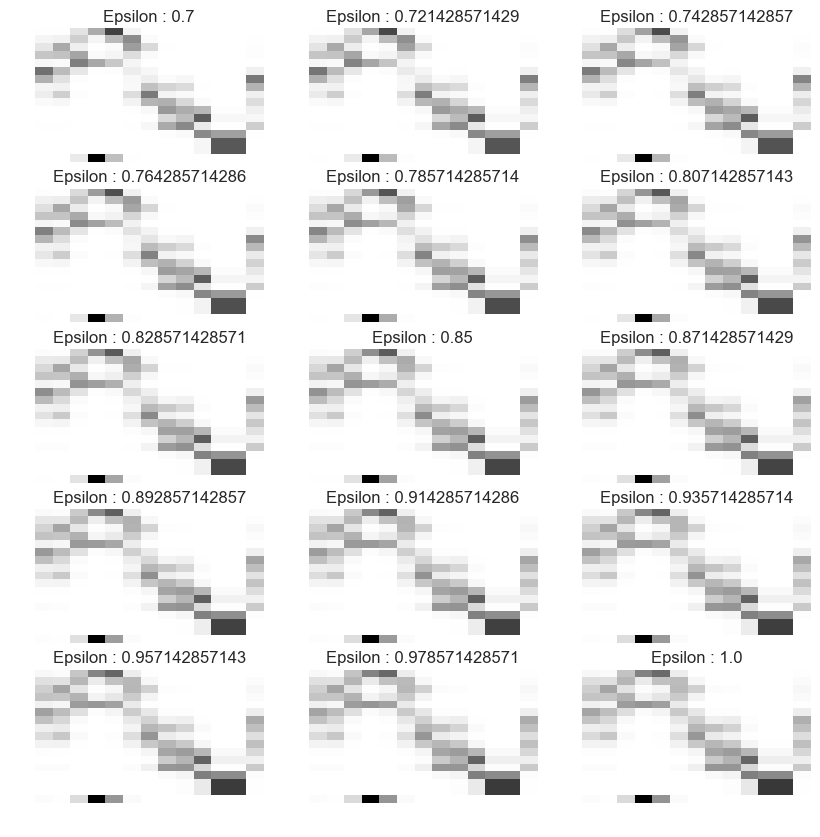

In [93]:
foo=[]
epsilons=np.linspace(0.7,1,15)
for eps in epsilons:
    gw=GW(epsilon=eps,method='shortest_path')
    d=gw.graph_d(graph1=X[0],graph2=X[1])
    foo.append(gw.transp)
fig, axs = plt.subplots(5, 3,figsize=(10, 10))
for i, ax in enumerate(axs.ravel()):
    ax.imshow(foo[i],interpolation='nearest', aspect='auto')
    ax.set_axis_off()
    ax.set_title('Epsilon : '+str(epsilons[i]))
plt.show()

## Avec EMD

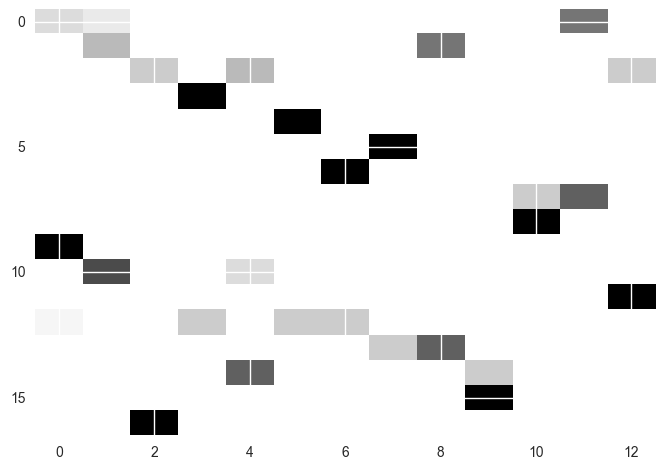

In [98]:
emd=EMD(features_metric='dirac')
d=emd.graph_d(graph1=X[0],graph2=X[1])
plt.imshow(emd.transp,interpolation='nearest',aspect='auto')
plt.show()

## Avec Gromov Wasserstein

//anaconda/lib/python3.5/site-packages/matplotlib/colors.py:943: UserWarning: Warning: converting a masked element to nan.
  vmin = float(vmin)
//anaconda/lib/python3.5/site-packages/matplotlib/colors.py:944: UserWarning: Warning: converting a masked element to nan.
  vmax = float(vmax)


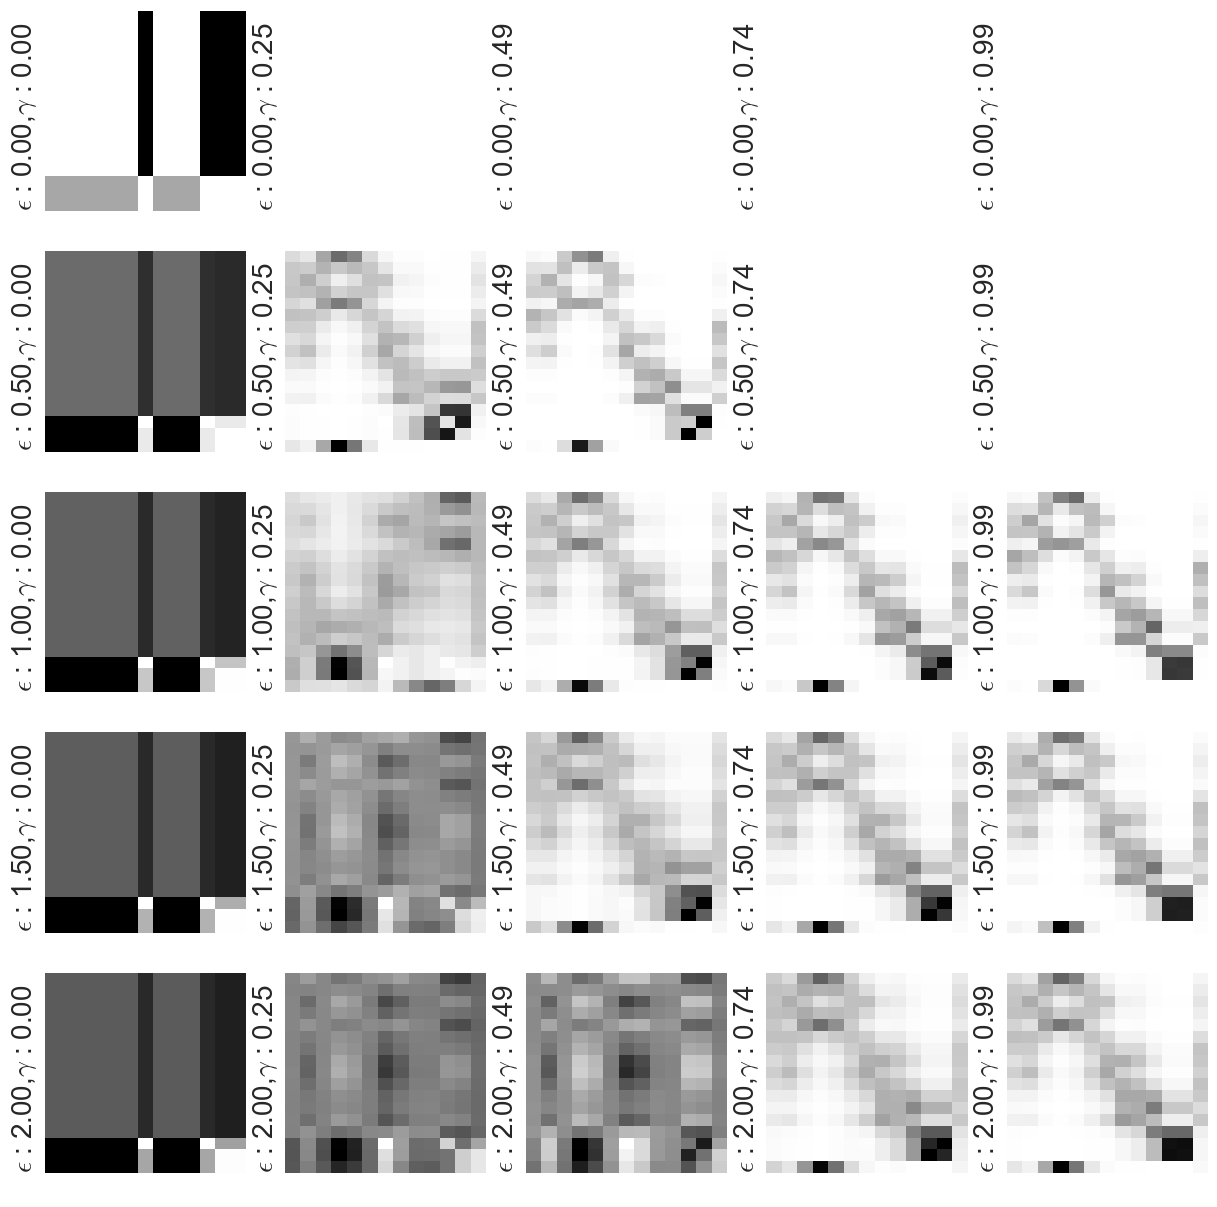

In [50]:
foo=dict()
epsilons=list(np.linspace(0.0001,2,5))
alphas=list(np.linspace(0,0.99,5))
i=0
j=0
for eps in epsilons:
    for alpha in alphas:
        wgw=WGW(epsilon=eps,alpha=alpha,method='shortest_path',features_metric='dirac')
        d=wgw.graph_d(graph1=X[0],graph2=X[1])
        foo[i,j]=wgw.transp
        j=j+1
    i=i+1
    j=0
fig, axs = plt.subplots(5, 5,figsize=(15, 15))
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.imshow(foo[i,j],interpolation='nearest', aspect='auto')
        ax.set_axis_off()
        title='$\epsilon$ : '+str("%.2f" % epsilons[i])+','+'$\gamma$ : '+str("%.2f" % alphas[j])
        ax.set_title(title,rotation='vertical',x=-0.1,y=0.8,fontsize=20)

plt.show()

//anaconda/lib/python3.5/site-packages/matplotlib/colors.py:943: UserWarning: Warning: converting a masked element to nan.
  vmin = float(vmin)
//anaconda/lib/python3.5/site-packages/matplotlib/colors.py:944: UserWarning: Warning: converting a masked element to nan.
  vmax = float(vmax)


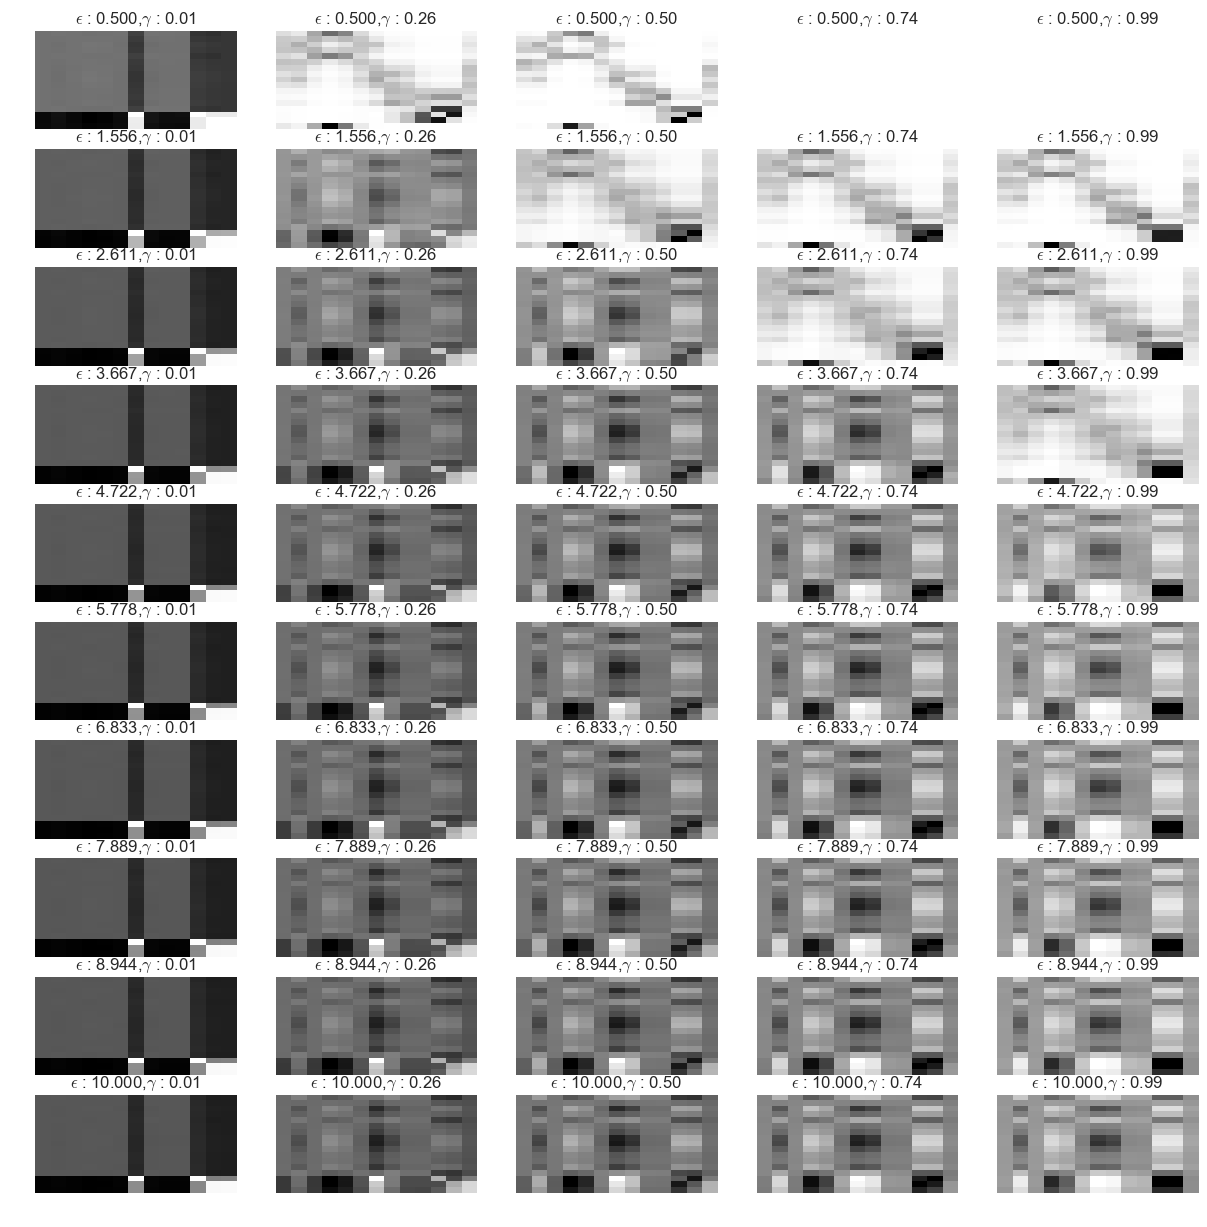

In [12]:
foo=dict()
epsilons=list(np.linspace(0.5,10,10))
alphas=list(np.linspace(0.01,0.99,5))
i=0
j=0
for eps in epsilons:
    for alpha in alphas:
        wgw=WGW(epsilon=eps,alpha=alpha,method='shortest_path',features_metric='dirac')
        d=wgw.graph_d(graph1=X[0],graph2=X[1])
        foo[i,j]=wgw.transp
        j=j+1
    i=i+1
    j=0
#fig, axs = plt.subplots(20, 5)
fig, axs = plt.subplots(10, 5,figsize=(15, 15))

for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.imshow(foo[i,j],interpolation='nearest', aspect='auto')
        ax.set_axis_off()
        title='$\epsilon$ : '+str("%.3f" % epsilons[i])+','+'$\gamma$ : '+str("%.2f" % alphas[j])
        ax.set_title(title)

plt.show()

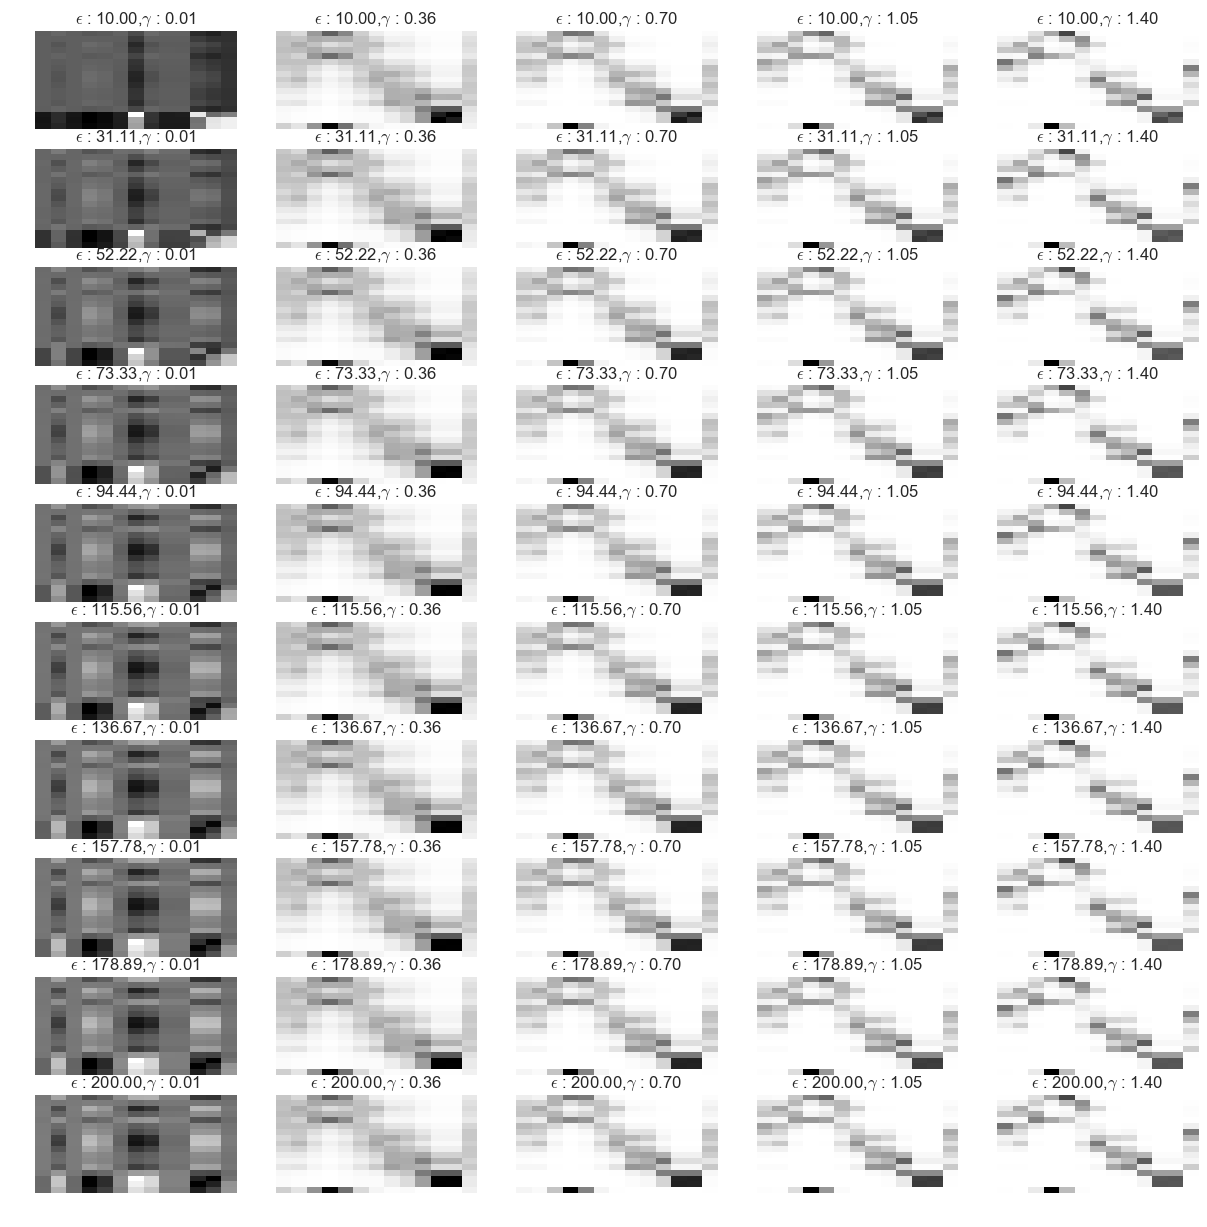

In [175]:
foo=dict()
epsilons=list(np.linspace(10,200,10))
ratios=list(np.linspace(0.01,1.4,5))
i=0
j=0
for eps in epsilons:
    for ratio in ratios:
        wgw=WGW(epsilon=eps,ratio=ratio,method='shortest_path',features_metric='dirac')
        d=wgw.graph_d(graph1=X[0],graph2=X[1])
        foo[i,j]=wgw.transp
        j=j+1
    i=i+1
    j=0
#fig, axs = plt.subplots(20, 5)
fig, axs = plt.subplots(10, 5,figsize=(15, 15))

for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.imshow(foo[i,j],interpolation='nearest', aspect='auto')
        ax.set_axis_off()
        title='$\epsilon$ : '+str("%.2f" % epsilons[i])+','+'$\gamma$ : '+str("%.2f" % ratios[j])
        ax.set_title(title)

plt.show()

On a quand même l'impression que ça converge vers la même matrice peut importe le epsilon de départ

In [177]:
foo=dict()
epsilons=list(np.linspace(0.01,200,30))
#ratios=list(np.linspace(0.01,1.4,5))
ratios=[1.4]
i=0
j=0
for eps in epsilons:
    for ratio in ratios:
        wgw=WGW(epsilon=eps,ratio=ratio,method='shortest_path',features_metric='dirac')
        d=wgw.graph_d(graph1=X[0],graph2=X[1])
        foo[i,j]=wgw.transp
        j=j+1
    i=i+1
    j=0

//anaconda/lib/python3.5/site-packages/matplotlib/colors.py:943: UserWarning: Warning: converting a masked element to nan.
  vmin = float(vmin)
//anaconda/lib/python3.5/site-packages/matplotlib/colors.py:944: UserWarning: Warning: converting a masked element to nan.
  vmax = float(vmax)


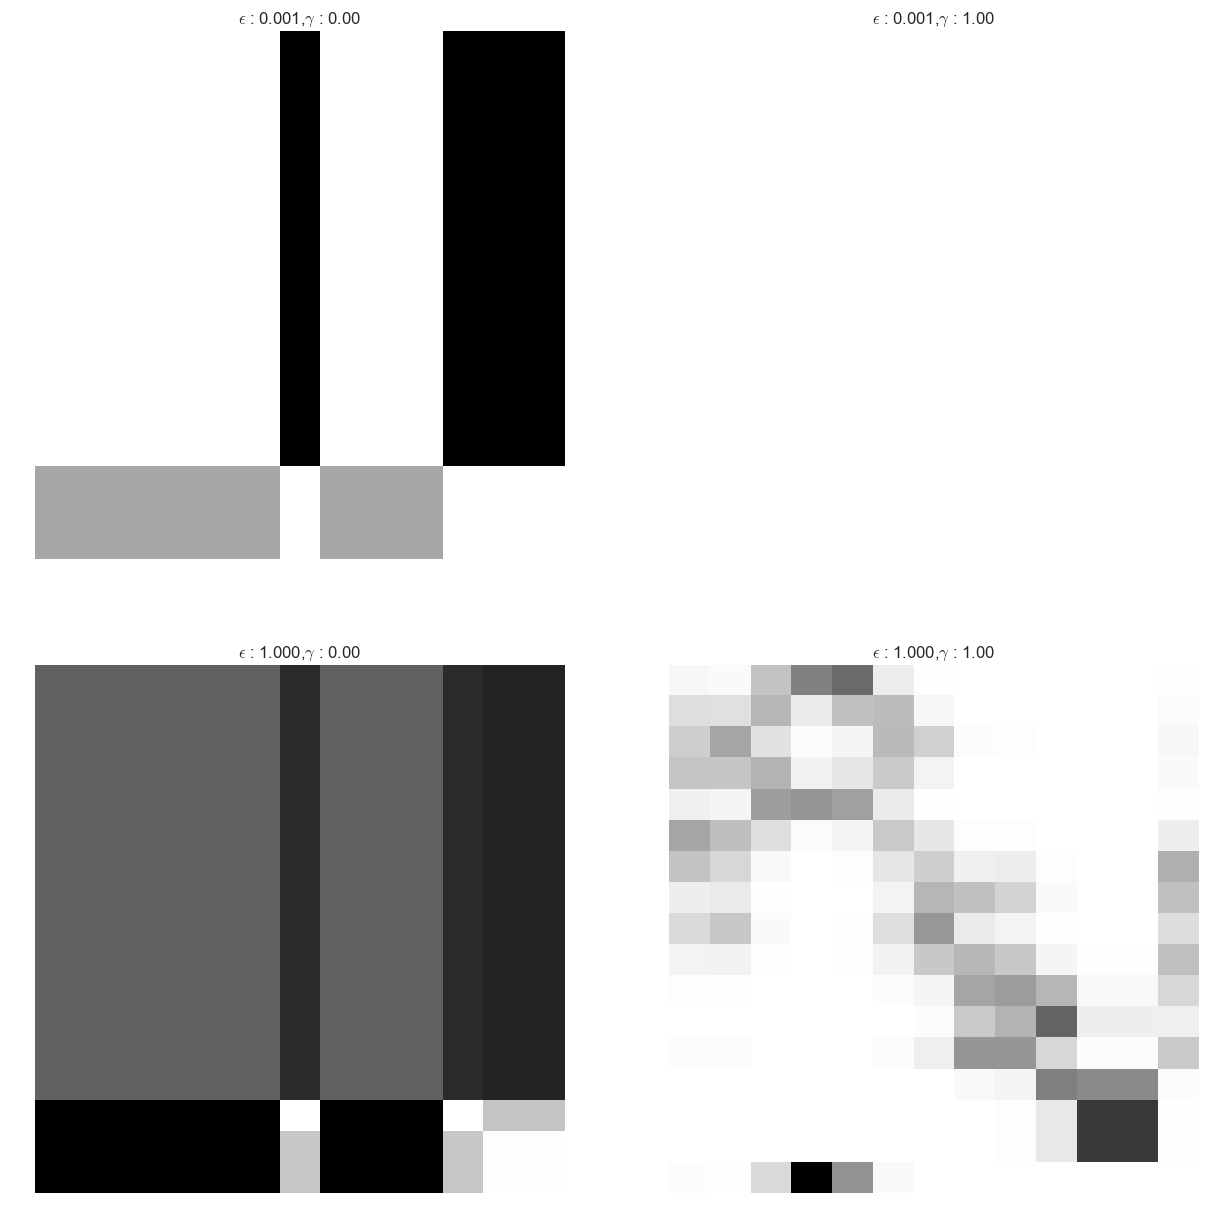

In [18]:
foo=dict()
epsilons=[0.001,1]
alphas=[0,1]
i=0
j=0
for eps in epsilons:
    for alpha in alphas:
        wgw=WGW(epsilon=eps,alpha=alpha,method='shortest_path',features_metric='dirac')
        d=wgw.graph_d(graph1=X[0],graph2=X[1])
        foo[i,j]=wgw.transp
        j=j+1
    i=i+1
    j=0
#fig, axs = plt.subplots(20, 5)
fig, axs = plt.subplots(2, 2,figsize=(15, 15))

for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.imshow(foo[i,j],interpolation='nearest', aspect='auto')
        ax.set_axis_off()
        title='$\epsilon$ : '+str("%.3f" % epsilons[i])+','+'$\gamma$ : '+str("%.2f" % alphas[j])
        ax.set_title(title)

plt.show()

### Retrouver Gromov

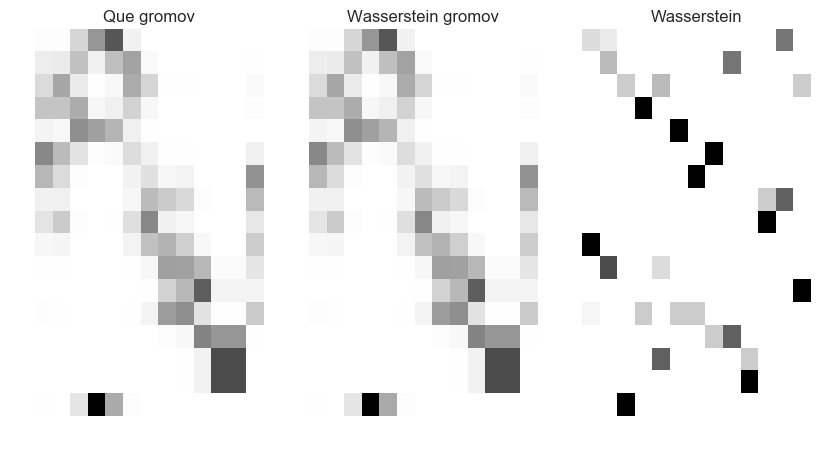

In [24]:
foo=[]
gw=GW(epsilon=0.8,method='shortest_path')
dgw=gw.graph_d(graph1=X[0],graph2=X[1])
wgw=WGW(epsilon=0.8,alpha=1,method='shortest_path',features_metric='dirac')
dwgw=wgw.graph_d(graph1=X[0],graph2=X[1])
emd=EMD(features_metric='dirac')
d=emd.graph_d(graph1=X[0],graph2=X[1])
fig, axs = plt.subplots(1, 3,figsize=(10, 5))
axs[0].imshow(gw.transp,interpolation='nearest',aspect='auto')
axs[0].set_title('Que gromov')
axs[0].set_axis_off()
axs[1].imshow(wgw.transp,interpolation='nearest',aspect='auto')
axs[1].set_title('Wasserstein gromov')
axs[1].set_axis_off()
axs[2].imshow(emd.transp,interpolation='nearest',aspect='auto')
axs[2].set_title('Wasserstein')
axs[2].set_axis_off()
plt.show()

## Retrouver Wasserstein

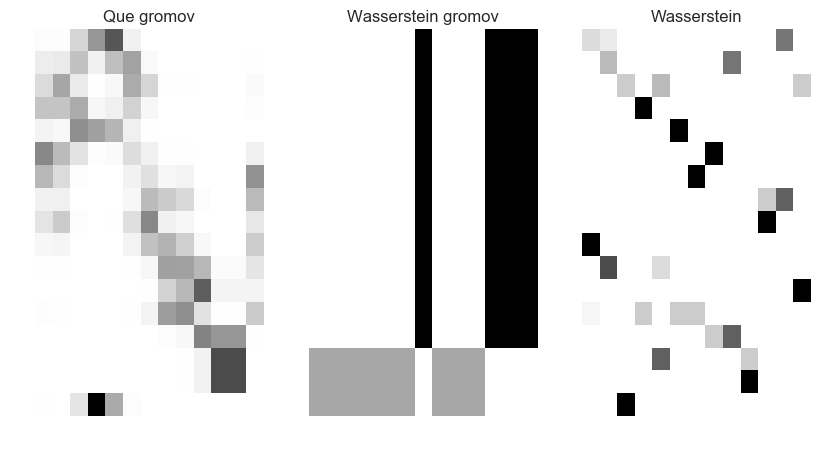

In [40]:
foo=[]
gw=GW(epsilon=0.8,method='shortest_path')
dgw=gw.graph_d(graph1=X[0],graph2=X[1])
wgw=WGW(epsilon=0.001,alpha=0,method='shortest_path',features_metric='dirac')
dwgw=wgw.graph_d(graph1=X[0],graph2=X[1])
emd=EMD(features_metric='dirac')
d=emd.graph_d(graph1=X[0],graph2=X[1])
fig, axs = plt.subplots(1, 3,figsize=(10, 5))
axs[0].imshow(gw.transp,interpolation='nearest',aspect='auto')
axs[0].set_title('Que gromov')
axs[0].set_axis_off()
axs[1].imshow(wgw.transp,interpolation='nearest',aspect='auto')
axs[1].set_title('Wasserstein gromov')
axs[1].set_axis_off()
axs[2].imshow(emd.transp,interpolation='nearest',aspect='auto')
axs[2].set_title('Wasserstein')
axs[2].set_axis_off()
plt.show()

In [37]:
graph1=X[0]
graph2=X[1]

nodes1=graph1.nodes()
nodes2=graph2.nodes()
t1masses = np.ones(len(nodes1))/len(nodes1)
t2masses = np.ones(len(nodes2))/len(nodes2)

In [38]:
x1=graph1.all_matrix_attr().reshape(-1, 1)
x2=graph2.all_matrix_attr().reshape(-1, 1)
f=lambda x,y: x==y
M=ot.dist(x1,x2,metric=f)

In [44]:
gamma,log=ot.sinkhorn(t1masses,t2masses,M,reg=0.001,log=True,numItermax=100)

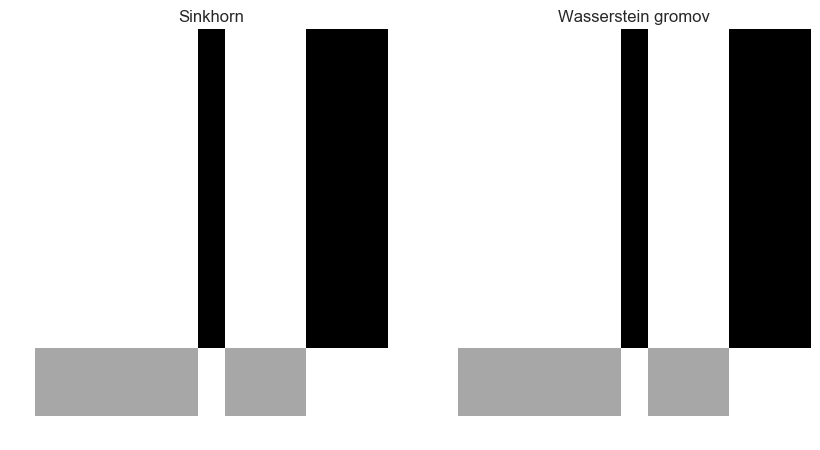

In [45]:
foo=[]
wgw=WGW(epsilon=0.001,alpha=0,method='shortest_path',features_metric='dirac')
dwgw=wgw.graph_d(graph1=X[0],graph2=X[1])
fig, axs = plt.subplots(1, 2,figsize=(10, 5))
axs[0].imshow(gamma,interpolation='nearest',aspect='auto')
axs[0].set_title('Sinkhorn')
axs[0].set_axis_off()
axs[1].imshow(wgw.transp,interpolation='nearest',aspect='auto')
axs[1].set_title('Wasserstein gromov')
axs[1].set_axis_off()
plt.show()

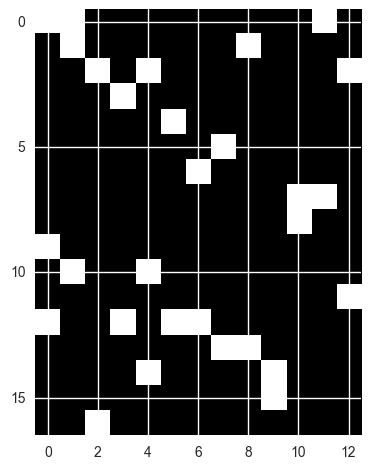

In [208]:
plt.imshow((emd.transp>0)!=(gw.transp>0),interpolation='nearest')
plt.show()

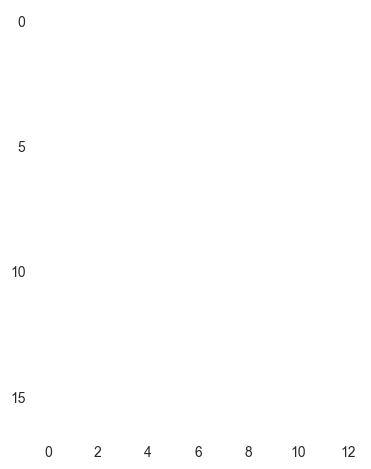

In [218]:
gw=GW(epsilon=0.7,method='shortest_path')
dgw=gw.graph_d(graph1=X[0],graph2=X[1])
wgw=WGW(epsilon=0.7,ratio=1.4,method='shortest_path',features_metric='dirac')
dwgw=wgw.graph_d(graph1=X[0],graph2=X[1])
plt.imshow((wgw.transp>0)!=(gw.transp>0),interpolation='nearest')
plt.show()